<a href="https://colab.research.google.com/github/reeaarana/EquationEye/blob/main/handwritten_math_expressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import kagglehub

# Download latest version
path = kagglehub.dataset_download("govindaramsriram/handwritten-math-expressions-dataset")

print("Path to dataset files:", path)



100%|██████████| 2.18M/2.18M [00:00<00:00, 154MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/govindaramsriram/handwritten-math-expressions-dataset/versions/1


In [ ]:
annotations_path = '/root/.cache/kagglehub/datasets/govindaramsriram/handwritten-math-expressions-dataset/versions/1/Maths_eqations_handwritten.xlsx'  # Remove /Sheet1
annotations = pd.read_excel(annotations_path, sheet_name='Sheet1')  # Specify sheet_name in pd.read_excel
annotations.columns = annotations.columns.str.lower()
print(annotations.head())

  expression  answer
0      3 + 4     7.0
1    (8 - 5)     3.0
2      6 * 2    12.0
3      9 ÷ 3     3.0
4      7 + 2     9.0


In [ ]:
print(annotations.tail())

             expression  answer
54         200 ÷ 50 + 8    12.0
55  (10 * 2 ) - (3 * 4)     8.0
56    (9 + 1) - (9 - 1)    80.0
57      4 * (3 + 5) - 7    25.0
58          8 * (7 - 3)    40.0


In [ ]:
images_path = '/root/.cache/kagglehub/datasets/govindaramsriram/handwritten-math-expressions-dataset/versions/1/Handwritten_equations_images'
image_files = [f"{i+1}.png" for i in range(len(annotations))]

print(f"Number of images: {len(image_files)}")

Number of images: 59


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split

# Paths
images_path = "/root/.cache/kagglehub/datasets/govindaramsriram/handwritten-math-expressions-dataset/versions/1/Handwritten_eqations_images"
annotations_path = "/root/.cache/kagglehub/datasets/govindaramsriram/handwritten-math-expressions-dataset/versions/1/Maths_eqations_handwritten.xlsx"

# Load labels
annotations = pd.read_excel(annotations_path, sheet_name="Sheet1")
annotations.columns = annotations.columns.str.lower()

# Load images
image_files = [f"{i+1}.png" for i in range(len(annotations))]
images = []
labels = []

for img_file, label in zip(image_files, annotations["Expression"]):
    img_path = os.path.join(images_path, img_file)
    if os.path.exists(img_path):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        img = cv2.resize(img, (128, 128))  # Resize to (128, 128)
        images.append(img)
        labels.append(label)

# Convert to NumPy arrays
X = np.array(images).astype("float32") / 255.0  # Normalize
y = np.array(labels)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Save preprocessed data
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_val.npy", X_val)
np.save("y_val.npy", y_val)

print("Preprocessing complete. Saved X_train.npy and y_train.npy!")


KeyError: 'Expression'

In [ ]:
\import numpy as np
import os
print(os.listdir())  # List files in the current directory
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Dataset Path
annotations_path = '/root/.cache/kagglehub/datasets/govindaramsriram/handwritten-math-expressions-dataset/versions/1/Maths_eqations_handwritten.xlsx'
images_path = '/root/.cache/kagglehub/datasets/govindaramsriram/handwritten-math-expressions-dataset/versions/1/Handwritten_equations_images'

# Load Annotations
annotations = pd.read_excel(annotations_path, sheet_name='Sheet1')
annotations.columns = annotations.columns.str.lower()
image_files = [f"{i+1}.png" for i in range(len(annotations))]

print(f"Number of images: {len(image_files)}")

# Load Preprocessed Data
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_val = np.load("X_val.npy")
y_val = np.load("y_val.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Normalize images
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

# Model Definition
num_classes = 59  # Update as needed
input_shape = (128, 128, 1)

model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile Model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Model
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=50, batch_size=32, callbacks=[early_stopping])

# Evaluate Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2%}")

# Save Model
model.save("math_expression_model.keras")

# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

['.config', 'ocr_cnn_model.h5', 'ocr_cnn_model_fixed.h5', 'sample_data']
Number of images: 59


FileNotFoundError: [Errno 2] No such file or directory: 'X_train.npy'

Available columns: Index(['Expression', 'Answer'], dtype='object')


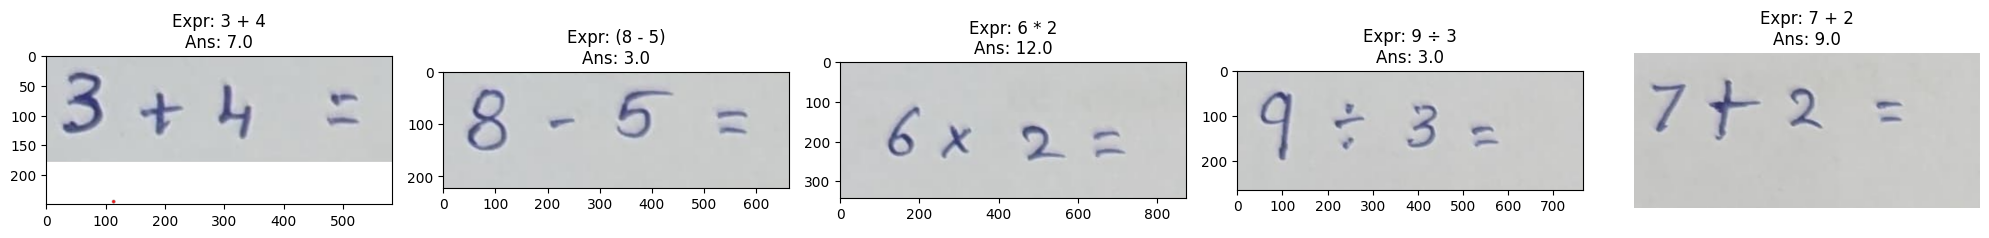

In [ ]:
#print("Available columns:", annotations.columns)

#annotations.columns = annotations.columns.str.lower()

#image_name_column = 'image_name'

#expression_column = 'expression'

#answer_column = 'answer'

#image_files = [f"{i+1}.png" for i in range(len(annotations))]

#fig, axes = plt.subplots(1, 5, figsize=(20, 8))

#for i in range(5):
  #image_name = image_files[i]
  #expression = annotations.loc[i, expression_column]
  #answer = annotations.loc[i, answer_column]
  #image_path = os.path.join(images_path, image_name)
  #img = Image.open(image_path)
  #axes[i].imshow(img, cmap='gray')
  #axes[i].set_title(f"Expr: {expression}\nAns: {answer}")
#axes[i].axis('off')
#plt.tight_layout()
#plt.show()

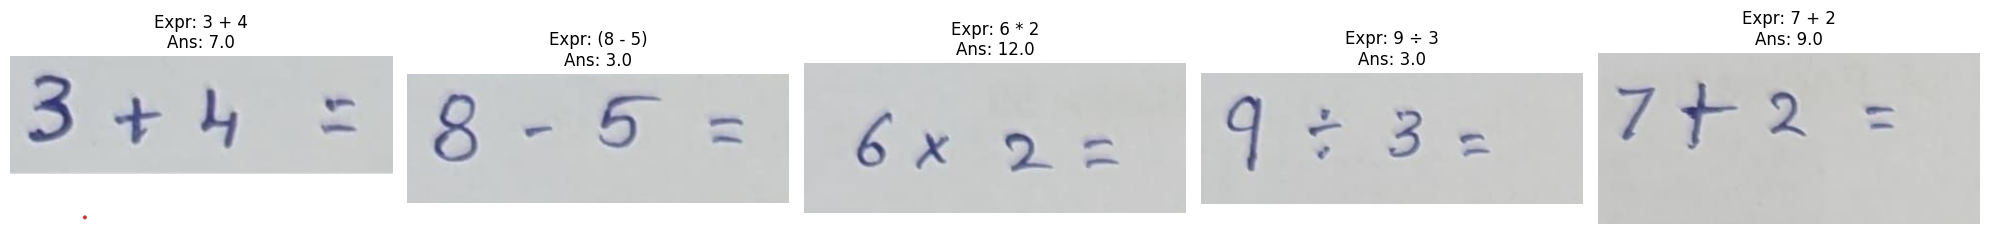

In [ ]:
import cv2
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
IMG_HEIGHT = 128
IMG_WIDTH = 128
annotations = pd.read_excel(annotations_path)
annotations.columns = annotations.columns.str.lower()
expression_column = 'expression'
answer_column = 'answer'
images = []
labels = []
image_files = [f"{i+1}.png" for i in range(len(annotations))]
for i, row in annotations.iterrows():
  image_name = image_files[i]
  image_path = os.path.join(images_path, image_name)
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
  img = img / 255.0
  images.append(img)
  labels.append(row[expression_column])
X = np.array(images)
X = X.reshape(X.shape[0], IMG_HEIGHT, IMG_WIDTH, 1)
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(labels)
labels_tokenized = tokenizer.texts_to_sequences(labels)
max_label_length = max(len(label) for label in labels_tokenized)
labels_tokenized = np.array([np.pad(label, (0, max_label_length -
len(label))) for label in labels_tokenized])
X_train, X_val, y_train, y_val = train_test_split(X, labels_tokenized,
test_size=0.2, random_state=42)
fig, axes = plt.subplots(1, 5, figsize=(20, 8))
for i in range(5):
  image_name = image_files[i]
  expression = annotations.loc[i, expression_column]
  answer = annotations.loc[i, answer_column]
  image_path = os.path.join(images_path, image_name)
  img = Image.open(image_path)
  axes[i].imshow(img, cmap='gray')
  axes[i].set_title(f"Expr: {expression}\nAns: {answer}")
  axes[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
def ocr_cnn_lstm_model(input_shape=(128, 128, 1), num_classes=19):
  inputs = layers.Input(shape=input_shape)
  x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
  x = layers.MaxPooling2D((2, 2))(x)
  x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  x = layers.MaxPooling2D((2, 2))(x)
  x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
  x = layers.MaxPooling2D((2, 2))(x)
  x = layers.Reshape(target_shape=(-1, 128))(x)
  x = layers.LSTM(128, return_sequences=False)(x)
  outputs = layers.Dense(num_classes, activation='softmax')(x)
  model = models.Model(inputs, outputs)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model
ocr_model = ocr_cnn_lstm_model()
ocr_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 256, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 19)                  │           2,451 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 226,707 (885.57 KB)

 Trainable params: 226,707 (885.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ",
len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
    logical_gpus = tf.config.experimental.list_virtual_devices()
    print(len(logical_gpus), "physical GPUs,", len(logical_gpus),"logical GPUs")
  except RuntimeError as e:
    print(e)

Virtual devices cannot be modified after being initialized


In [ ]:
history = ocr_model.fit(X_train, y_train, validation_data=(X_val, y_val),
epochs=100, batch_size=32)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 718ms/step - accuracy: 0.1126 - loss: 160.8407 - val_accuracy: 0.1667 - val_loss: 146.3111
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1372 - loss: 151.5582 - val_accuracy: 0.1667 - val_loss: 141.7909
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1372 - loss: 147.2534 - val_accuracy: 0.1667 - val_loss: 136.8055
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.1372 - loss: 150.1175 - val_accuracy: 0.1667 - val_loss: 138.6293
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.1372 - loss: 152.1750 - val_accuracy: 0.1667 - val_loss: 142.1111
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1268 - loss: 157.9279 - val_accuracy: 0.1667 - val_loss: 147.2435
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1164 - loss: 160.8009 - val_accuracy: 0.1667 - val_loss: 153.8327
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.1164 - loss: 170.8915 - v

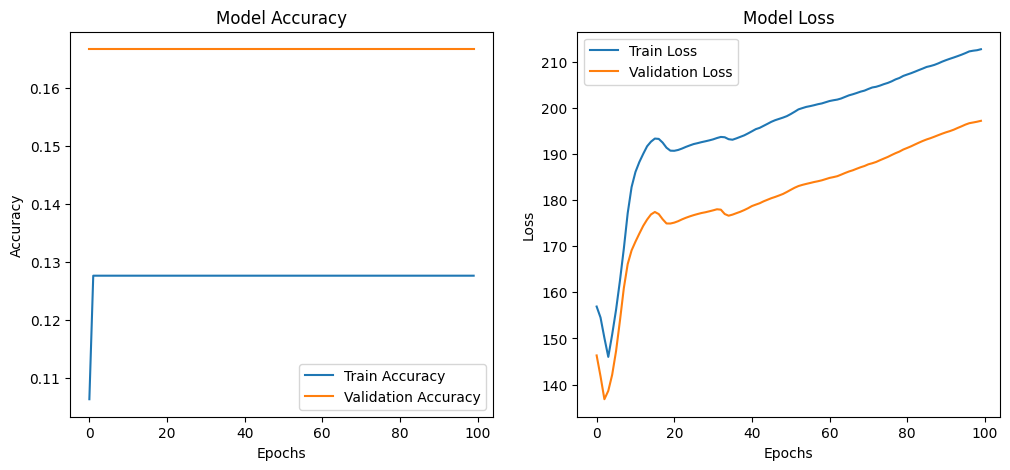

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
test_loss, test_accuracy = ocr_model.evaluate(X_val, y_val)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1667 - loss: 197.2330
Test Loss: 197.2330
Test Accuracy: 0.1667


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = ocr_model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

print(classification_report(y_true_classes, y_pred_classes))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
              precision    recall  f1-score   support

           0       0.17      1.00      0.29         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         2

    accuracy                           0.17        12
   macro avg       0.02      0.11      0.03        12
weighted avg       0.03      0.17      0.05        12



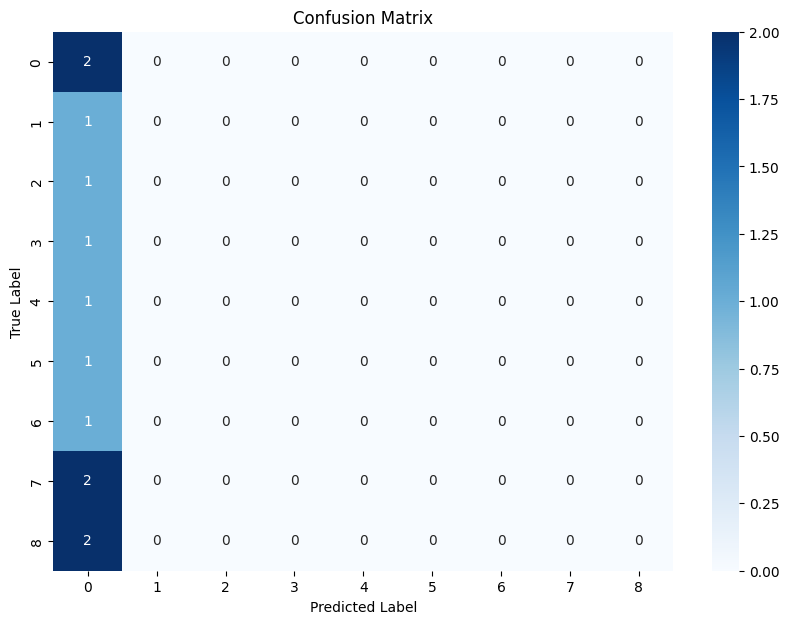

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
ocr_model.save('ocr_cnn_lstm_model.h5')
print("Model saved successfully.")


Model saved successfully.


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('ocr_cnn_lstm_model.h5')
test_loss, test_accuracy = loaded_model.evaluate(X_val, y_val)
print(f"Loaded Model Test Accuracy: {test_accuracy:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step - accuracy: 0.1667 - loss: 197.2330
Loaded Model Test Accuracy: 0.1667
